In [90]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/concrete-data/concrete.csv


In [91]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
%matplotlib inline
sb.set_style('whitegrid')
print("Setup Complete")

Setup Complete


In [92]:
slump_data = pd.read_csv("../input/concrete-data/concrete.csv")
slump_data

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


In [93]:
slump_data.shape

(1030, 9)

In [94]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

features = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age']
X = slump_data[features]
y = slump_data.strength
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size=0.8, random_state=1)
print("Training Set :", len(train_X))
print("Testing Set :", len(val_X))
print("Total Size :", len(slump_data))

Training Set : 824
Testing Set : 206
Total Size : 1030


In [95]:
def test(sent_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=sent_leaf_nodes, random_state=1)
    model.fit(train_X, train_y)
    val_predictions = model.predict(val_X)
    print("RMSE :", mean_squared_error(val_y, val_predictions))
    print("Score :", model.score(val_X, val_y))
    print("R2_Score :", r2_score(val_y, val_predictions))
    
test_nodes = [i for i in range(5,1000,100)]
for sent_nodes in test_nodes:
    print("Leaf Nodes :", sent_nodes)
    test(sent_nodes, train_X, val_X, train_y, val_y)
    print("\n")

Leaf Nodes : 5
RMSE : 133.4806961665535
Score : 0.5467074735973101
R2_Score : 0.5467074735973101


Leaf Nodes : 105
RMSE : 49.86492202011132
Score : 0.8306616826963091
R2_Score : 0.8306616826963091


Leaf Nodes : 205
RMSE : 42.91400793831242
Score : 0.8542665746052873
R2_Score : 0.8542665746052873


Leaf Nodes : 305
RMSE : 42.70548168398481
Score : 0.8549747173956689
R2_Score : 0.8549747173956689


Leaf Nodes : 405
RMSE : 42.597728994365966
Score : 0.8553406391379639
R2_Score : 0.8553406391379639


Leaf Nodes : 505
RMSE : 42.97157312065198
Score : 0.8540710866607012
R2_Score : 0.8540710866607012


Leaf Nodes : 605
RMSE : 42.52976983518536
Score : 0.8555714244113546
R2_Score : 0.8555714244113546


Leaf Nodes : 705
RMSE : 42.372092044228694
Score : 0.8561068888363466
R2_Score : 0.8561068888363466


Leaf Nodes : 805
RMSE : 42.37335533980582
Score : 0.8561025987595025
R2_Score : 0.8561025987595025


Leaf Nodes : 905
RMSE : 42.37335533980582
Score : 0.8561025987595025
R2_Score : 0.856102598

In [132]:
model = DecisionTreeRegressor(random_state=1)
model.fit(train_X, train_y)
val_predictions = model.predict(val_X)
print(val_X.cement.shape)
print(val_predictions.shape)
print(model.get_params())
r2_score(val_y, val_predictions)

(206,)
(206,)
{'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 1, 'splitter': 'best'}


0.8704391080079129

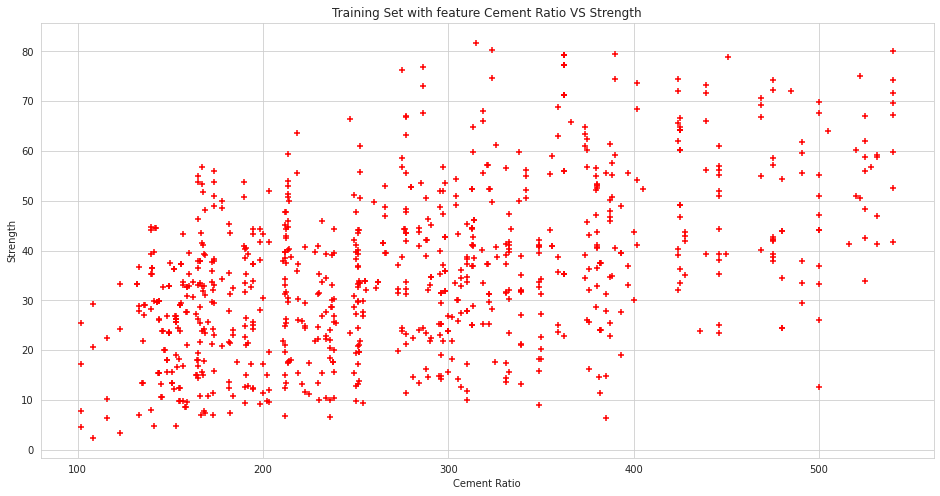

In [133]:
plt.figure(figsize=(16,8))
plt.title('Training Set with feature Cement Ratio VS Strength')
plt.scatter(train_X.cement, train_y, color='red', marker="+")
plt.xlabel('Cement Ratio')
plt.ylabel('Strength')
plt.show()

In [141]:
actual_predicted = pd.DataFrame({'Actual Strength':[i for i in val_y], 
                                 'Predicted Strength' : [i for i in val_predictions]})
actual_predicted.head(15)

,Actual Strength,Predicted Strength
0,47.78,39.70
1,48.79,48.85
2,33.70,38.60
3,18.28,18.29
4,14.99,17.24
5,24.92,25.69
6,55.90,44.90
7,65.20,64.30
8,16.50,16.50
9,25.57,27.22


206
206


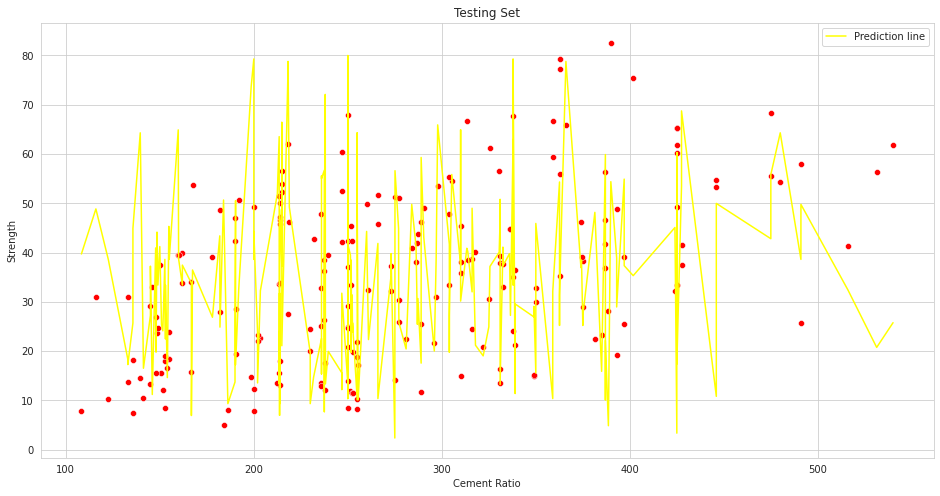

In [136]:
import numpy as np
plt.figure(figsize=(16,8))
plt.title('Testing Set')
sb.scatterplot(x=val_X.cement, y=val_y, color='red')

#Plotting the DecisionTreeRegressor
X_grid = np.sort(val_X.cement)
print(X_grid.size)
print(val_predictions.size)
plt.plot(X_grid, val_predictions, color='yellow', label='Prediction line')

plt.xlabel('Cement Ratio')
plt.ylabel('Strength')
plt.legend()
plt.show()

In [123]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1)
model.fit(train_X, train_y)
rf_predictions = model.predict(val_X)
r2_score(val_y, rf_predictions)

0.9193309057162352